## The Titanic poject will be to predict is a person will live or die based on ther characteristics that are provided about them.  Machine Learning and Logestic Regression will be use to characterize each individual 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
titanic = pd.read_csv("resources/titanic_train.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### There are some missing data in the cabin series. we will use a heatmap to target the missing data. We can see that there is many ages and cabin numbers missing from the data set in the heat map. The Age data here is relevant and we will need to fill in resonable data. Cabin on the other hand we will need to drop since there is too many items missing.

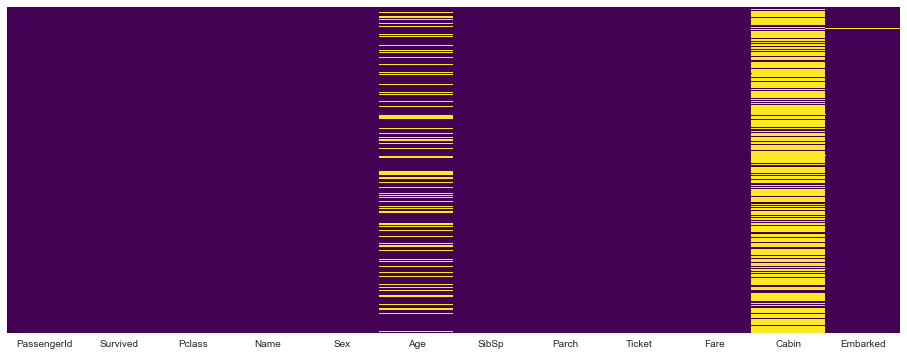

In [5]:
plt.figure(figsize=(16,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

## Lets do some exploratoy analysis to see the count of who survived and who did not. Its a good idea to get some sort of ratio for the target data. There are approximately 550 people that did not survive and 325 that survived based on this plot. 

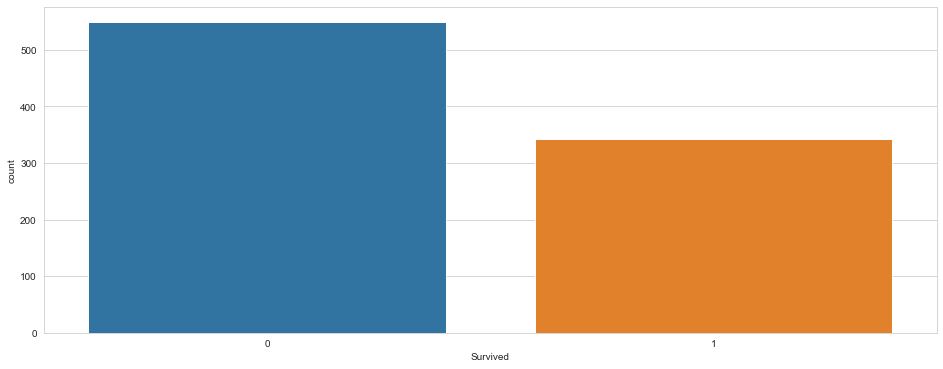

In [6]:
plt.figure(figsize=(16,6))
sns.countplot(x='Survived', data=titanic)

## There is some curosity on if there is a survival rate difference betwen women and men. THe plot below tells us that there is a higher survival rate for females vs male

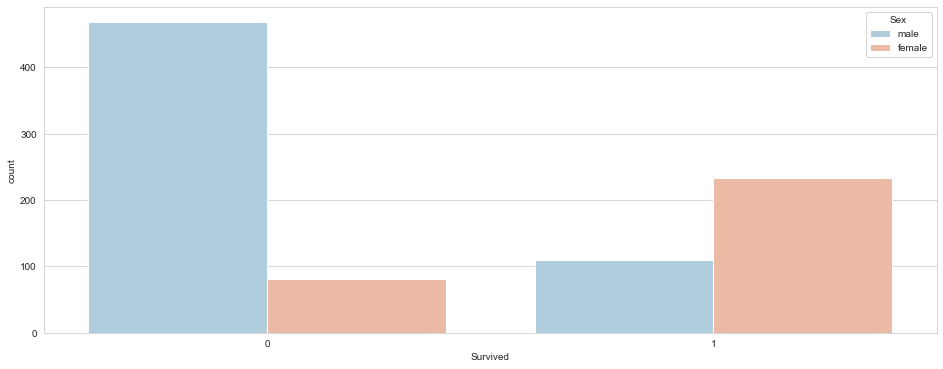

In [7]:
plt.figure(figsize=(16,6))
sns.countplot(x = "Survived", data=titanic, hue="Sex", palette="RdBu_r")

## Passengers were in diffferent classes on the ship so we may want to check that survival rate based on the class for the person. Below we see more people died that belonged to class 3. We can presume that these were closer to the bottom of the ship. On the other hand the survival rate for class 3 was higher than class 2

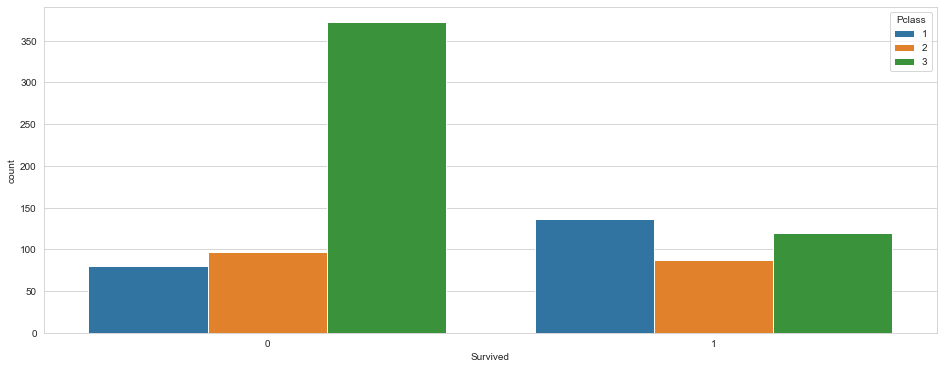

In [8]:
plt.figure(figsize=(16,6))
sns.countplot(x = "Survived", data=titanic, hue = "Pclass")

## Class and sex has been analyzed for the passangers. We will need to consider the age for each passanger. There is an average age range between is around 20 to 40 with a few younfer and up in the 70s and 80s. 

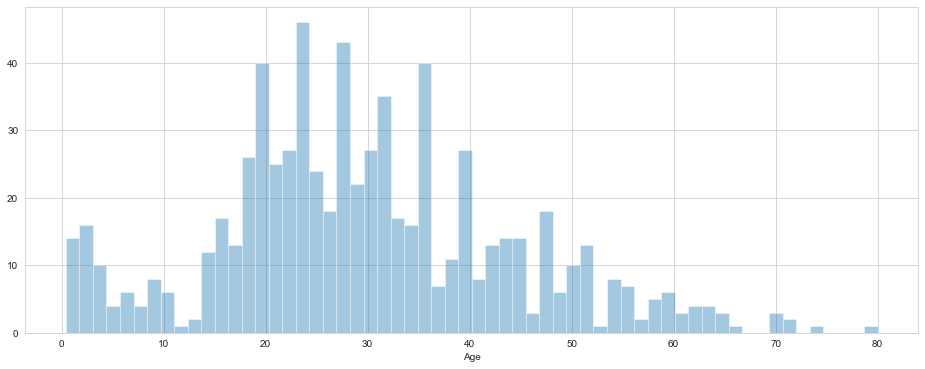

In [9]:
plt.figure(figsize=(16,6))
sns.distplot(titanic["Age"].dropna(), kde=False, bins = 60)

## Survival rate between women and men ralatied to age are shown below. The average age of a male the did not survive was between 22 and 38 with a few between 65 and 75. Women who did not survive was between the ages of 18 and 32. 

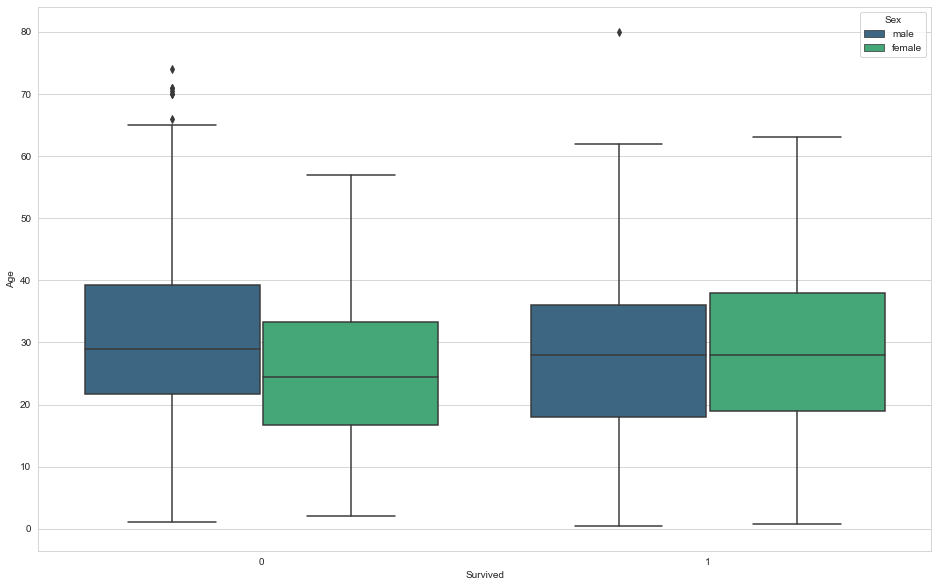

In [10]:
plt.figure(figsize=(16,10))
sns.boxplot(x = "Survived", y = "Age", data=titanic, hue="Sex", palette="viridis")

In [11]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Fare 
### The majority of fares ranged form saay $10  to $100 with most being at the lower end. There is one fare/outlyer that was a littlet over $500. We can assume this was either a very large group or someone wealthy with some sort of presidential suite(potentially) 

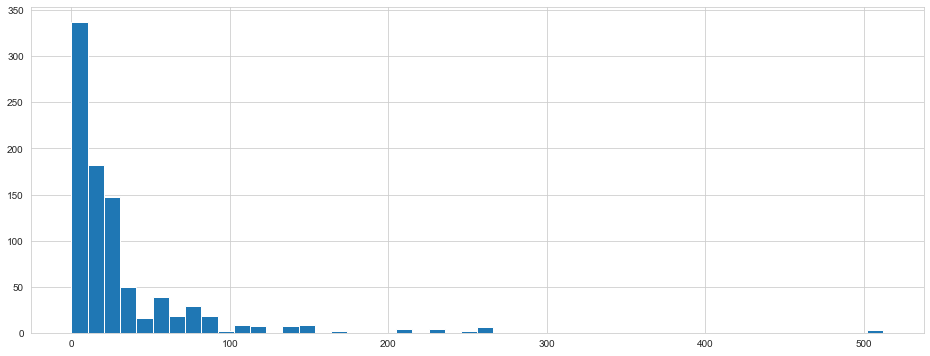

In [12]:
titanic["Fare"].hist(bins = 50, figsize = (16,6))

## Pclass
#### The large majority of pasangers were in class 3 which was the less expensive class. This will make more sence of the fare histogram above at indicated the lower prices being the majority. 

#### There were aloso alot more males and females in leven 3 than 2. Overall there were more males than females in all classes

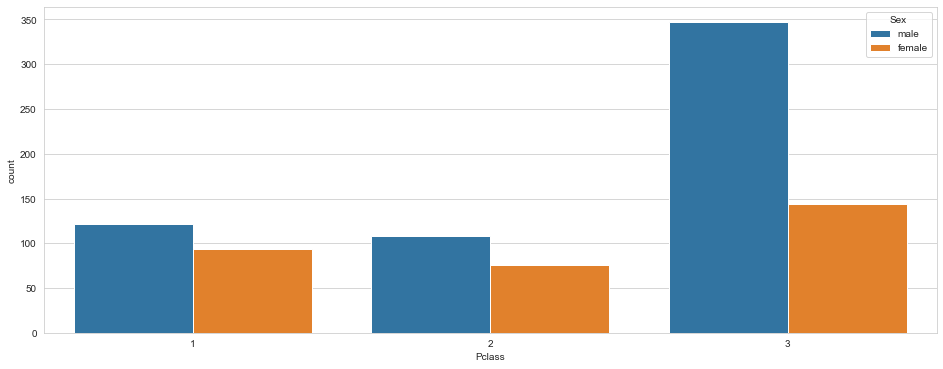

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(x = "Pclass", data=titanic, hue="Sex")

# SibSp -> Siblings and Spouce count
#### The majority of passangers on the titanic was single with no siblings or spouse on board. This would relate to the age og the passangers. The 8 takes a hint at a really large family maybe related to the 500 Fare we saw earlier.  When considering passangers who survived most that did not survive were single as well. Unfortunatly the person with 8 siblings/spouse lost their life.

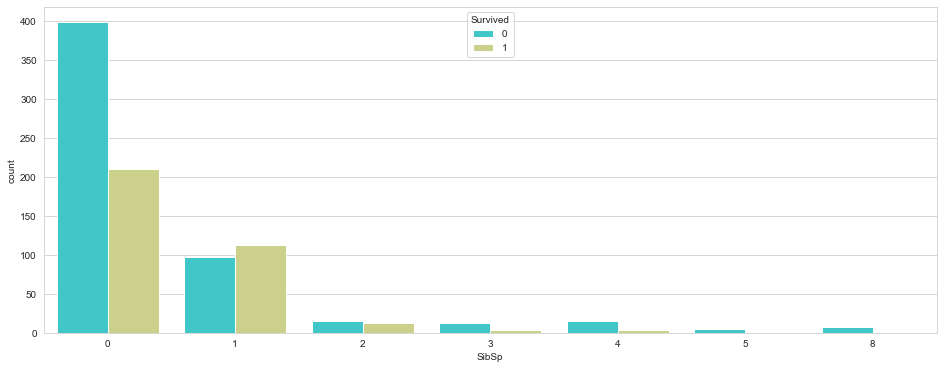

In [14]:
plt.figure(figsize=(16,6))
sns.countplot(x = "SibSp", data=titanic, hue="Survived", palette="rainbow")

## Missing Data/Cleaning Data
### We will fill in the average of the missing age (imputation). It would be easy to just average out the age and replace the missing daa with  that number, but we have enough data that we can make this replacements more accurate. The Pclass data can give us a better idea of the age range in diffferenct class. This will be a better way to replace the data. Below the plot show the average ages of the passengers per class so we will these average agesto replace the missing data. 

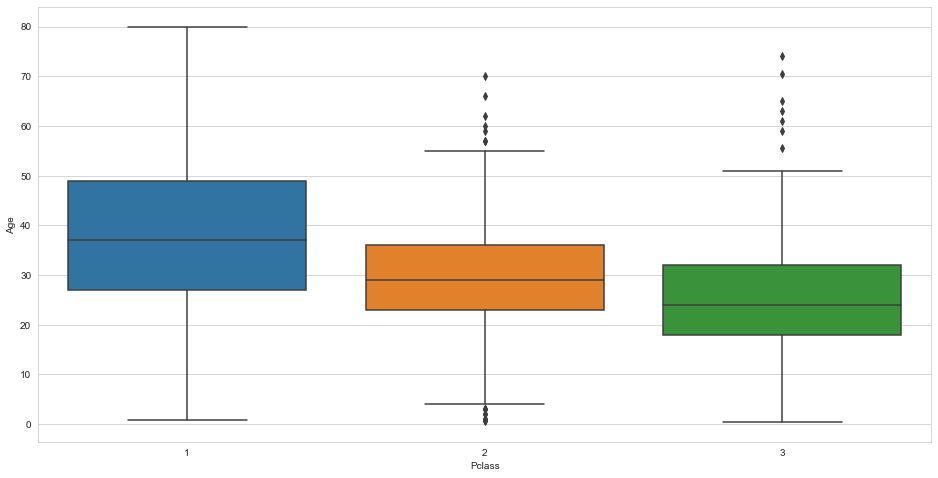

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "Pclass", y= "Age", data=titanic)

In [16]:
def imputeAge(cols):
    Age = cols[0]
    Plass = cols[1]
    if pd.isnull(Age):
        if Plass == 1:
            return 37
        elif Plass == 2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [17]:
titanic["Age"] = titanic[["Age", "Pclass"]].apply(imputeAge, axis = 1)

## WE replaces the ages properly based on the Pclass. Cabin colun has too many missing data points so we will remove it. The Emarked Column is missing one data point so we wull simply remove it. This should clean up our data as you can see below. Now we can set up our data for analysis and Machine Learning Algorithim

In [18]:
titanic.drop("Cabin", axis=1, inplace=True)

In [19]:
titanic.dropna(inplace=True)

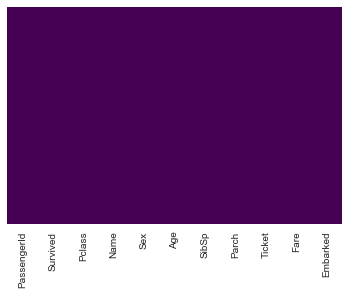

In [20]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

#### WE now need to set up our categorical Featurs. Other wise our algorithims will not be able to take in stings of male or female. We will need to use values of 0 and 1 to represent sex of passangers. THese are indicator/dummy variables. We only take one column, say "Male" because on e column is a perfect predictor of the other. Will will alter out ML Algorythim results, causuing multi culinarity.  So dropping the first column assist from causing this issue.  The same process will be done for the embarked column and since we are getting 3 columns CQS dropping C will not cause Q and S to be perfect predictors of each other.

In [21]:
sex = pd.get_dummies(titanic["Sex"], drop_first=True)

In [22]:
embarked = pd.get_dummies(titanic["Embarked"], drop_first=True)

## We will combine the new data sets to the frame and remove the unessary data columns that we will use. This will give us all numerical data for the algorithym. 

In [23]:
titanic_Updated = pd.concat([titanic,sex,embarked], axis=1)

In [24]:
titanic_Updated.drop(["Name", 'Embarked', "Ticket"], axis=True, inplace=True)

In [25]:
titanic_Updated.drop("Sex", inplace=True, axis=1)

In [26]:
titanic_Updated.drop("PassengerId", inplace=True, axis=1)

In [27]:
titanic_Updated.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Create Train And Build our Logistic Model

In [28]:
X = titanic_Updated.drop("Survived", axis=1)
y = titanic_Updated["Survived"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predictions = model.predict(X_test)

### Classificaiton Report - The precision here is pretty good but there may be room to increase the precision for the data set. Maybe using the eitirety of the data set. Things to consider -> Ticket, Name, etc. 

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
print(confusion_matrix(y_test, predictions))

[[148  15]
 [ 36  68]]
